#### KMeans

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa


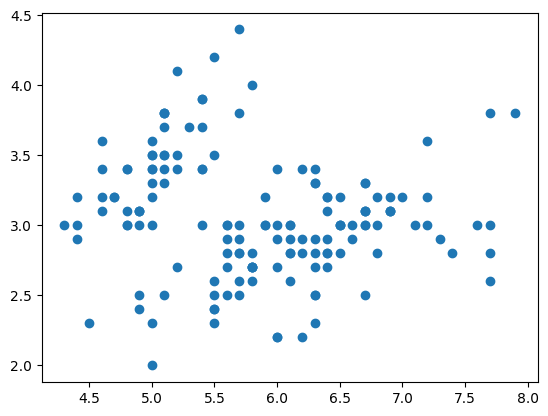

In [62]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("Iris.csv", index_col=0)
print(data.head())

x = data.drop(columns=["Species"])

plt.scatter(x["SepalLengthCm"],x["SepalWidthCm"])


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
0.5509643746707443


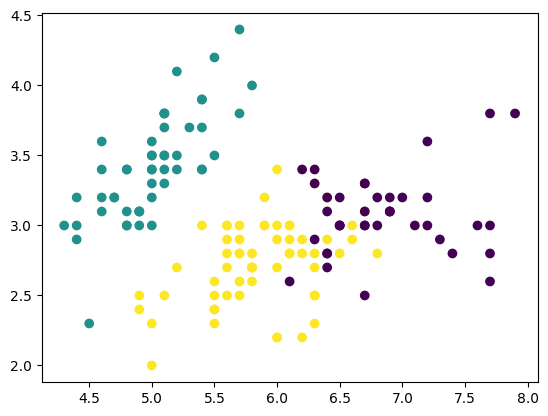

In [63]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(x)
y_pred = model.predict(x)
print(y_pred)

from sklearn.metrics import silhouette_score

score = silhouette_score(x,y_pred)
print(score)

plt.scatter(x["SepalLengthCm"],x["SepalWidthCm"],c=y_pred)

[680.8244000000001, 152.36870647733906, 78.940841426146, 57.317873214285704, 49.74079031410784, 38.930963049671746, 38.03076056049213, 32.97607727756115, 31.882847727272733]


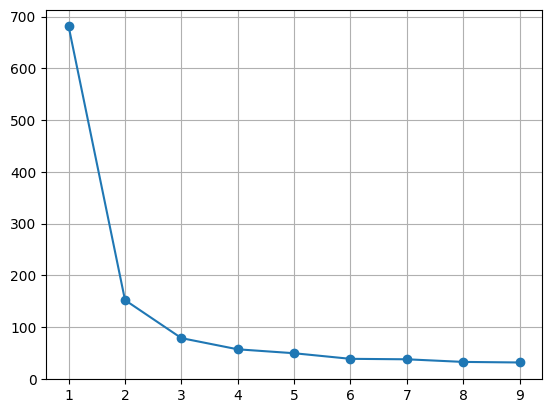

In [64]:
k = range(1,10)
sse = []

for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
print(sse) 

plt.plot(k, sse, marker="o")
plt.grid()
plt.show()

In [65]:
model = KMeans(n_clusters=2)
model.fit(x)
y_pred = model.predict(x)

score = silhouette_score(x,y_pred)
score

0.6808136202936816

#### Hierarchical clustering (Agglomerative approach)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
0.5540972908150553


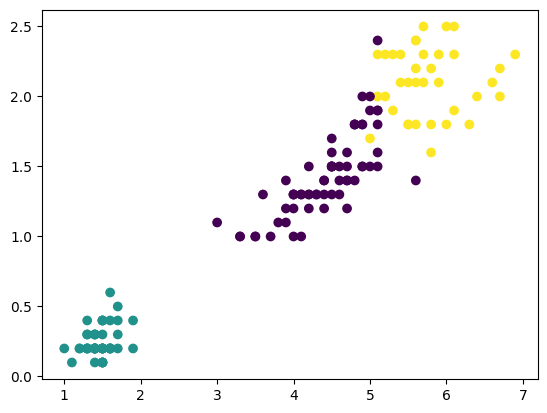

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Ward linkage minimizes the variance within each cluster as clusters are merged.
# It tries to merge two clusters that result in the smallest increase in total within-cluster variance.
# Since ward linkage is used, metric must be euclidean

agg = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
y_pred = agg.fit_predict(x)

print(y_pred)

print(silhouette_score(x,y_pred))

plt.scatter(x["PetalLengthCm"], x["PetalWidthCm"], c=y_pred)

0.5118387098922373


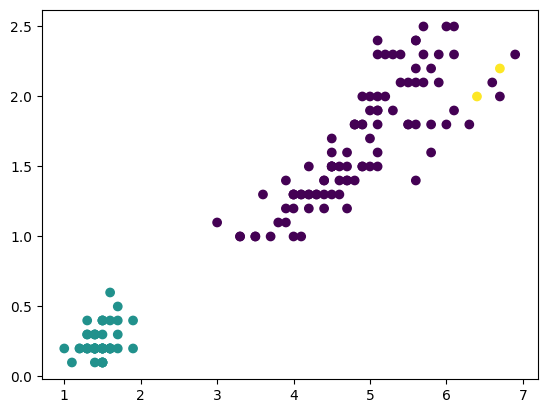

0.5133502348448076


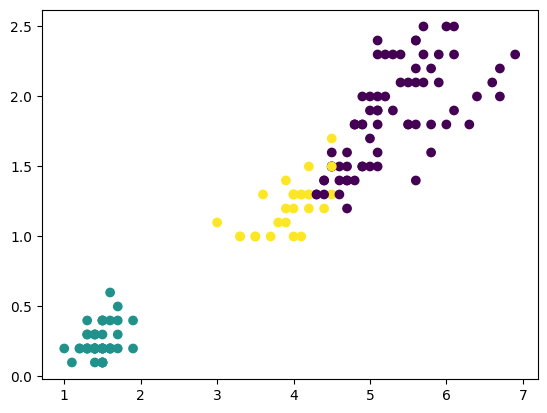

0.5539343898551252


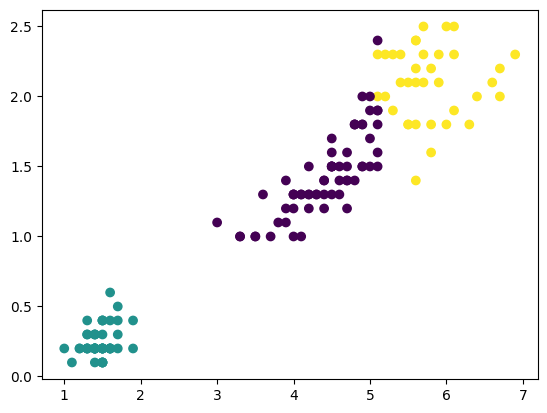

In [67]:
agg = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="single")
y_pred = agg.fit_predict(x)
print(silhouette_score(x,y_pred))
plt.scatter(x["PetalLengthCm"], x["PetalWidthCm"], c=y_pred)
plt.show()

agg = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="complete")
y_pred = agg.fit_predict(x)
print(silhouette_score(x,y_pred))
plt.scatter(x["PetalLengthCm"], x["PetalWidthCm"], c=y_pred)
plt.show()

agg = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="average")
y_pred = agg.fit_predict(x)
print(silhouette_score(x,y_pred))
plt.scatter(x["PetalLengthCm"], x["PetalWidthCm"], c=y_pred)
plt.show()

#### DBSCAN

0.5016061910978403


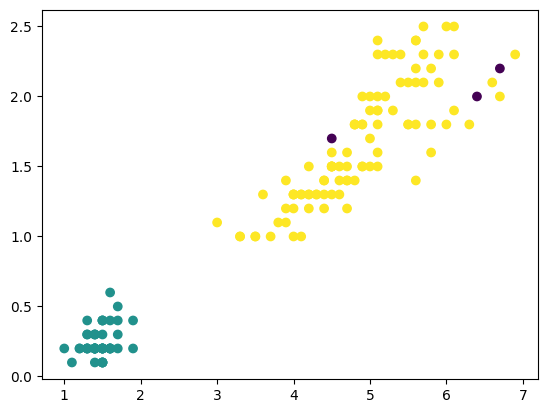

In [71]:
from sklearn.cluster import DBSCAN

# eps (epsilon): Defines max dist between two points for them to be considered neighbors.
# Think of it as a radius around a point — if another point is within this radius, it's considered reachable.
# Smaller eps → more, tighter clusters/ Larger eps → fewer, looser clusters

# min_samples: Minimum number of points required to form a dense region (i.e., a core point).
# A point is considered a core point if it has at least min_samples neighbors within eps.

dbscan = DBSCAN(eps=0.7, min_samples=5)
y_pred = dbscan.fit_predict(x)
print(silhouette_score(x,y_pred))
plt.scatter(x["PetalLengthCm"], x["PetalWidthCm"], c=y_pred)
plt.show()